# Path of training and test set

In [1]:
file_path_train = '/home/ocean/NT114.O11.ATCL-IDS/Datasets/KDDTrain+.txt'
file_path_test = '/home/ocean/NT114.O11.ATCL-IDS/Datasets/KDDTest+.txt' 

## Concatenate 2 files

In [2]:
# filelist = [file_path_train, file_path_test]

# # Write into the new file
# with open('/home/ocean/NT114.O11.ATCL-IDS/Datasets/KDD_Train+Test.txt', 'w') as out:
#     for file in filelist:
#         with open(file) as infile:
#             contents = infile.read()
#             out.write(contents)

# Data preprocessing

## Split into train, validation and test set

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler # for stardardizing the data to the normal scale
from sklearn.model_selection import train_test_split # for splitting data into train and test

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read dataset
df = pd.read_csv('/home/ocean/NT114.O11.ATCL-IDS/Datasets/KDD_Train+Test.txt')

In [5]:
# Split into 60% training, 10% validation, 10% testing
train_df, validation_df, test_df = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])

## Add the column labels

### Dataset Feature names

In [6]:
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate", "class", 'difficulty level'])

Class-label attacks are fall into 4 categories of data.

1. Denial of service (Dos), where attempts are to suspend services of a network resource making it unavailable to its intended users by overloading the server with too many requests to be handled.

2. Probe attacks, where the hacker scans the network with the aim of exploiting a known vulnerability

3. Remote-to-Local (R2L) attacks, where an attacker tries to gain local access to unauthorized information through sending packets to the victim machine. 

4. User-to-Root (U2R) attacks, where an attacker gains root access to the system using his normal user account to exploit vulnerabilities.

# Training set

In [7]:
# train_df = pd.read_csv(file_path_train, names=col_names)
train_df.columns = col_names
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
72826,0,tcp,courier,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
135320,0,tcp,private,S0,0,0,0,0,0,0,...,0.02,0.06,0.00,0.00,0.02,0.75,0.98,0.25,neptune,21
60054,0,udp,private,SF,28,0,0,3,0,0,...,0.31,0.69,0.31,0.00,0.09,0.00,0.60,0.00,teardrop,19
82759,0,tcp,http,SF,347,654,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
114678,21479,tcp,private,RSTR,1,0,0,0,0,0,...,0.01,0.70,1.00,0.00,0.00,0.00,1.00,1.00,portsweep,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33130,0,tcp,http,REJ,0,0,0,0,0,0,...,1.00,0.00,0.02,0.16,0.00,0.00,1.00,1.00,normal,21
142325,0,udp,private,SF,55,55,0,0,0,0,...,1.00,0.00,0.83,0.00,0.00,0.00,0.00,0.00,normal,17
41445,0,tcp,http,SF,279,765,0,0,0,0,...,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,normal,21
118535,0,tcp,http,REJ,0,0,0,0,0,0,...,1.00,0.00,0.01,0.13,0.00,0.00,1.00,0.99,normal,21


## Classify different class labels into attack_types

In [8]:
Dos = ['land','neptune','smurf','pod','back','teardrop']
Probe = ['portsweep','ipsweep','satan','nmap']
U2R = ['buffer_overflow','loadmodule','perl','rootkit']

def encode_attack(vec):
    if vec in Dos:
        return "Dos"
    elif vec in Probe:
        return "Probe"
    elif vec in U2R:
        return "U2R"
    elif vec == "normal":
        return "normal"
    else:
        return "R2L"

## Creating new variable called "attack_type" where it classified different "class" labels to Dos, Probe, U2R, R2L and Normal

In [9]:
train_df['attack_type'] = train_df['class'].apply(encode_attack)
train_df.iloc[:10, -5:]

,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
72826,0.00,0.00,neptune,19,Dos
135320,0.98,0.25,neptune,21,Dos
60054,0.60,0.00,teardrop,19,Dos
82759,0.00,0.00,normal,21,normal
114678,1.00,1.00,portsweep,15,Probe
137555,0.00,0.00,normal,20,normal
143302,0.00,0.00,normal,21,normal
81415,0.00,0.00,neptune,21,Dos
56034,0.00,0.00,normal,21,normal
77359,0.00,0.00,normal,20,normal


## Different attack types data sizes

In [10]:
train_df.groupby('attack_type').size()

attack_type
Dos       31146
Probe      7672
R2L        4202
U2R          53
normal    46036
dtype: int64

## Percentage of data hold by different attack types

In [11]:
percent_data = (train_df.groupby('attack_type').size())/train_df.shape[0] * 100
percent_data

attack_type
Dos       34.952698
Probe      8.609680
R2L        4.715573
U2R        0.059478
normal    51.662571
dtype: float64

## Amount of different attack types hold the data

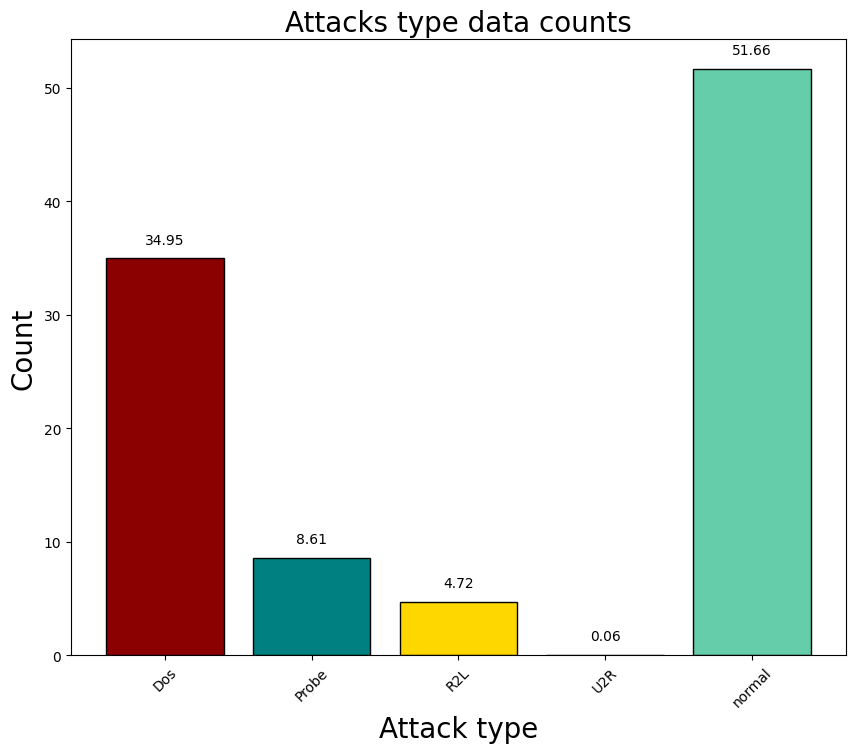

In [12]:
fig = plt.figure(figsize = (10,8))
r_ = [round(each, 2) for each in percent_data.values]
ax = fig.add_subplot(111)
ax.bar(percent_data.index, percent_data.values, color = ['darkred', 'teal', 'gold', 'lightseagreen', "mediumaquamarine"], edgecolor = 'black')
ax.set_xticklabels(percent_data.index, rotation = 45)
ax.set_xlabel("Attack type", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Attacks type data counts", fontsize = 20)

for i in range(len(percent_data.values)):
    plt.annotate(str(r_[i]), xy=(percent_data.index[i],r_[i]+1), ha='center', va='bottom')

## Different protocol types

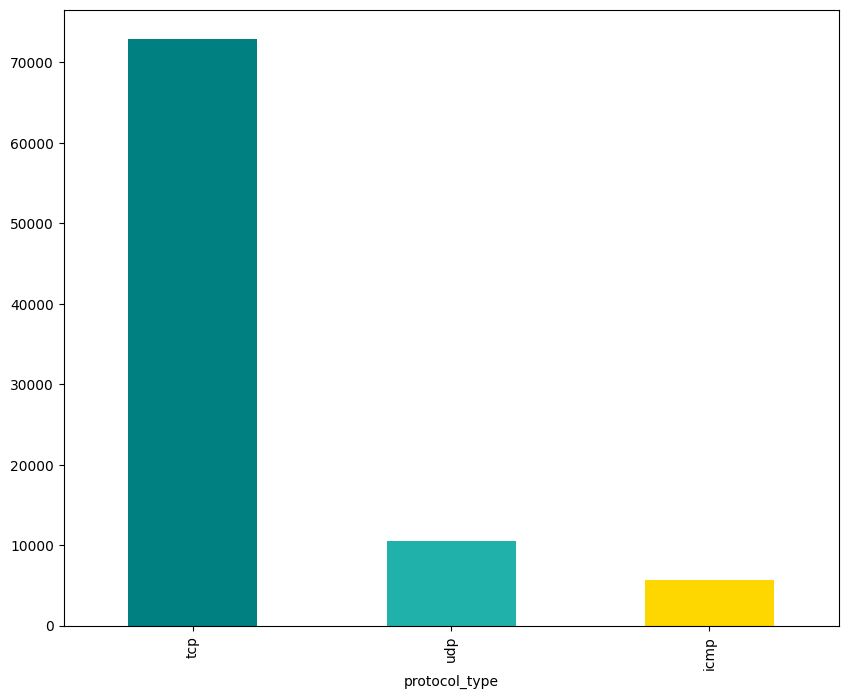

In [13]:
plt.subplots(figsize=(10,8))
train_df['protocol_type'].value_counts(normalize = True)
train_df['protocol_type'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

## Different types of Services in Data

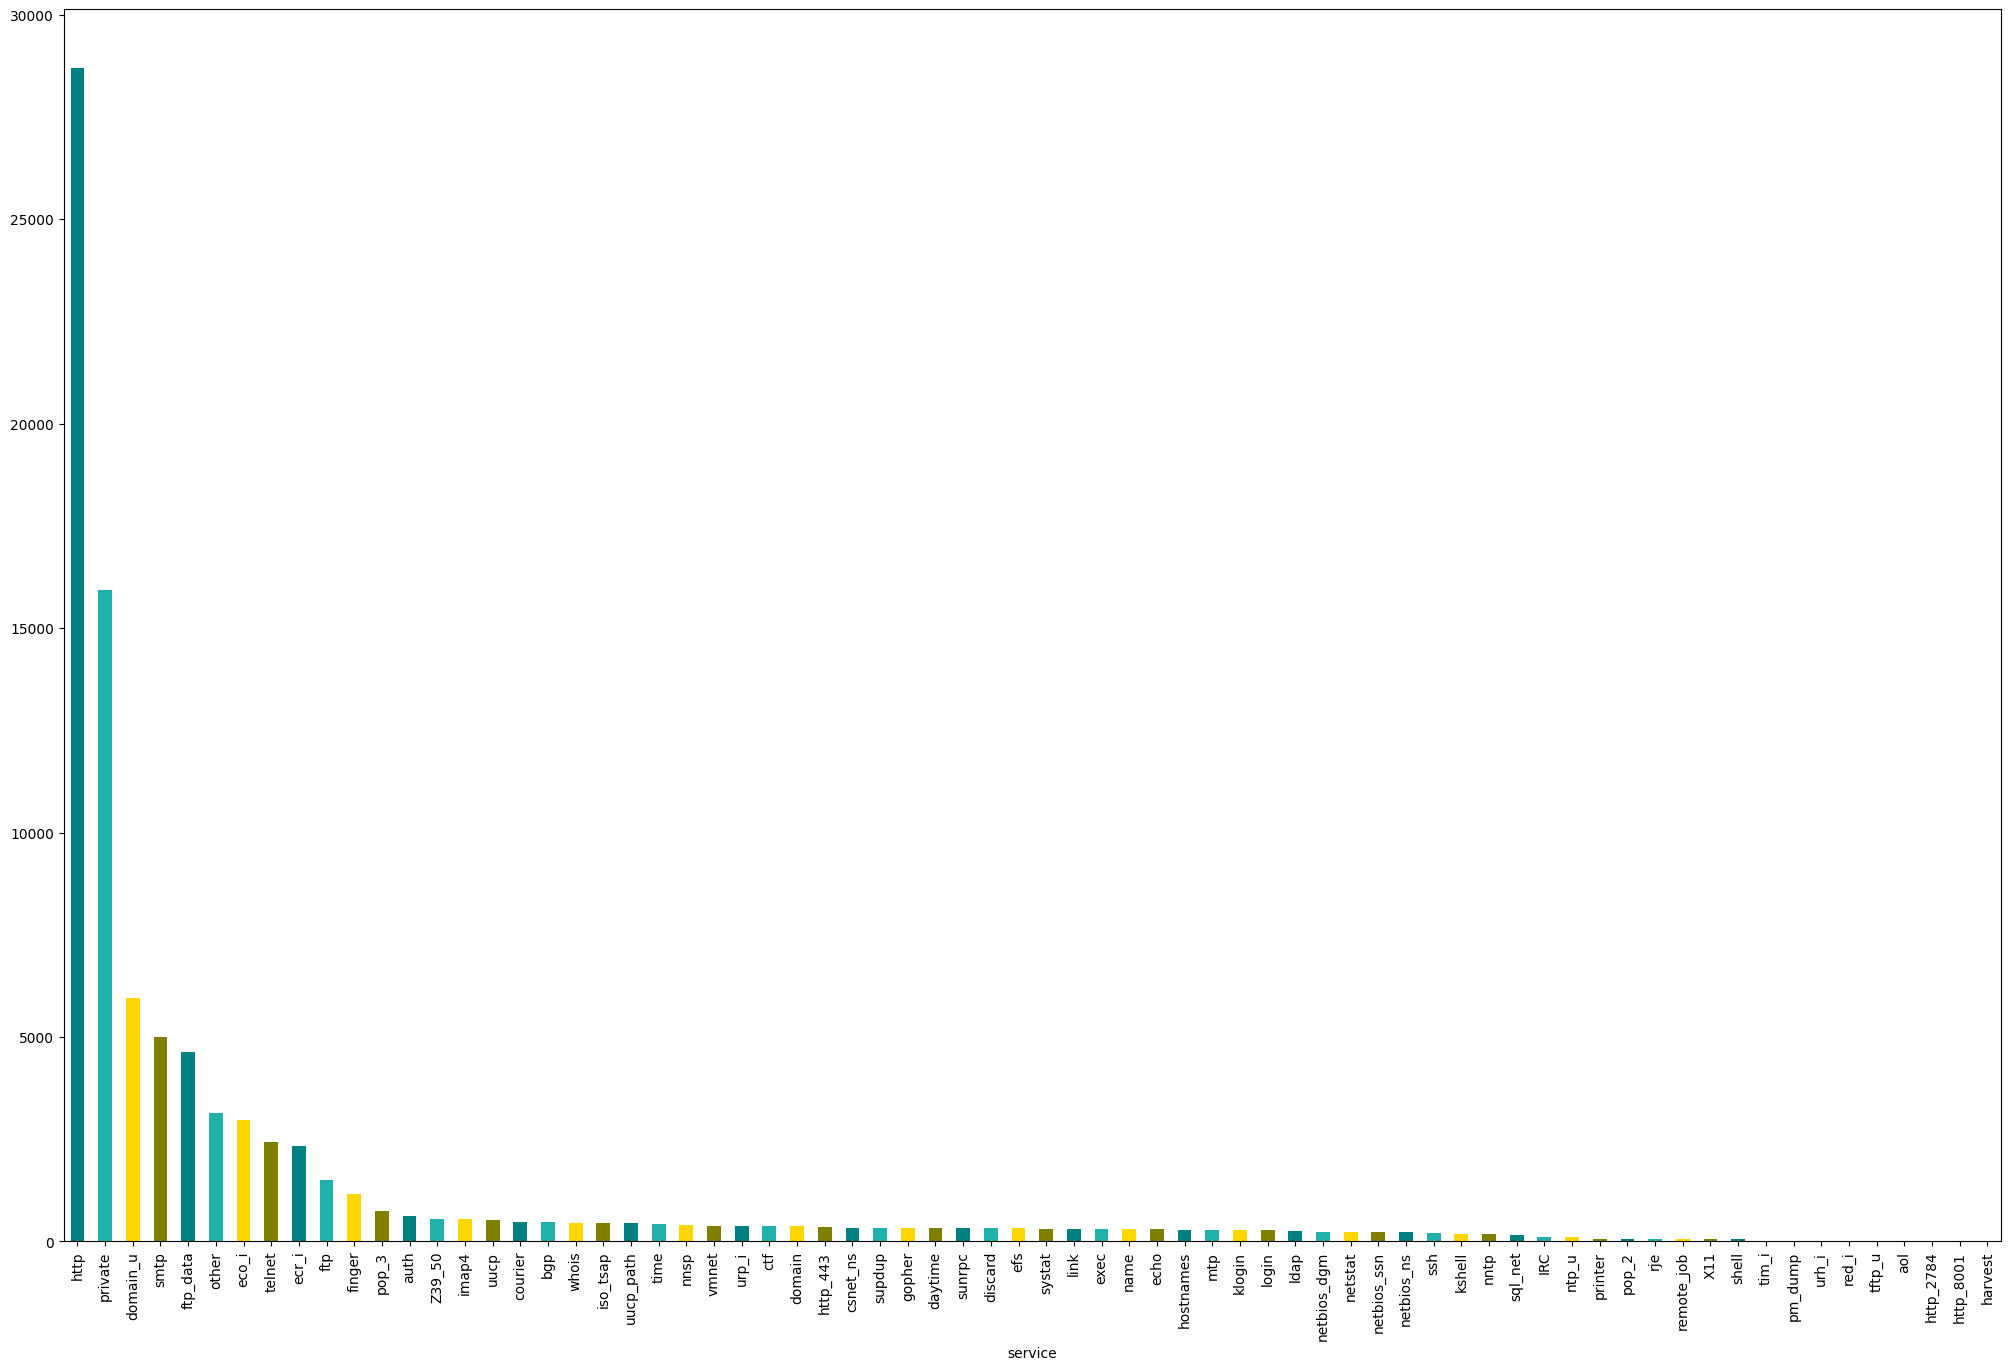

In [14]:
plt.subplots(figsize=(25,16))
train_df['service'].value_counts(normalize = True)
train_df['service'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

## Different types of Flags in data

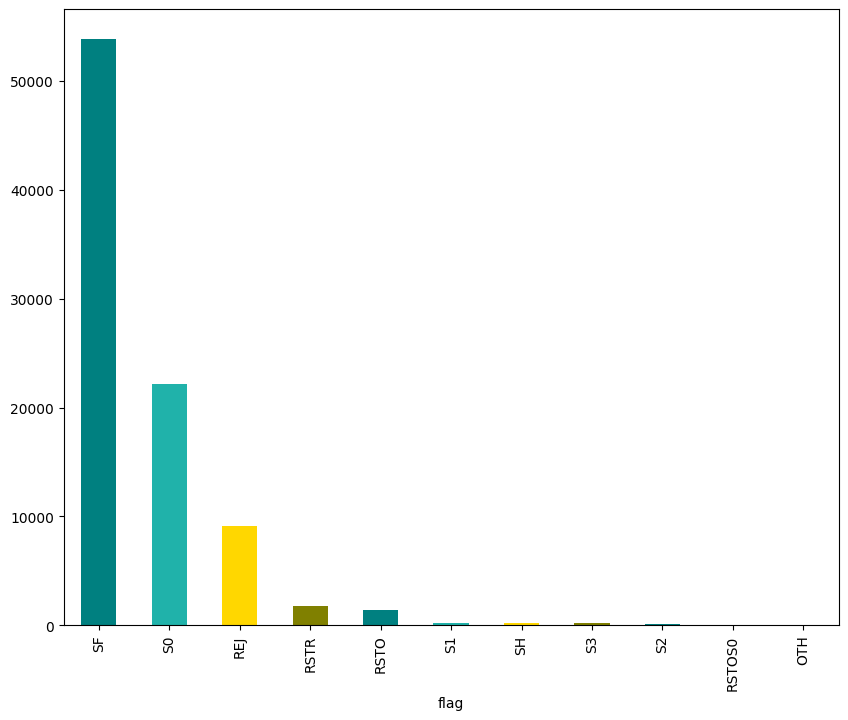

In [15]:
plt.subplots(figsize=(10,8))
train_df['flag'].value_counts(normalize = True)
train_df['flag'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

In [16]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
72826,0,tcp,courier,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,Dos
135320,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.02,0.75,0.98,0.25,neptune,21,Dos
60054,0,udp,private,SF,28,0,0,3,0,0,...,0.69,0.31,0.00,0.09,0.00,0.60,0.00,teardrop,19,Dos
82759,0,tcp,http,SF,347,654,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
114678,21479,tcp,private,RSTR,1,0,0,0,0,0,...,0.70,1.00,0.00,0.00,0.00,1.00,1.00,portsweep,15,Probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33130,0,tcp,http,REJ,0,0,0,0,0,0,...,0.00,0.02,0.16,0.00,0.00,1.00,1.00,normal,21,normal
142325,0,udp,private,SF,55,55,0,0,0,0,...,0.00,0.83,0.00,0.00,0.00,0.00,0.00,normal,17,normal
41445,0,tcp,http,SF,279,765,0,0,0,0,...,0.00,0.01,0.02,0.00,0.00,0.00,0.00,normal,21,normal
118535,0,tcp,http,REJ,0,0,0,0,0,0,...,0.00,0.01,0.13,0.00,0.00,1.00,0.99,normal,21,normal


In [17]:
numerical_cols = [one for each,one in zip(list(train_df.dtypes),train_df.dtypes.index)  if each == 'int64' or each == 'float64']
numerical_cols

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'difficulty level']

## Encoding attack_type to numerical for multi-label classification

In [18]:
# Function encoding to numerical value
def attack_encode(value):
    if value == 'normal':
        return 0
    elif value == "Dos":
        return 1
    elif value == 'Probe':
        return 2
    elif value == 'R2L':
        return 3
    else:
        return 4

### Creating a column for output

In [19]:
train_df['intrusion_code'] = train_df['attack_type'].apply(attack_encode)
train_df.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
72826,0.00,neptune,19,Dos,1
135320,0.25,neptune,21,Dos,1
60054,0.00,teardrop,19,Dos,1
82759,0.00,normal,21,normal,0
114678,1.00,portsweep,15,Probe,2
137555,0.00,normal,20,normal,0
143302,0.00,normal,21,normal,0
81415,0.00,neptune,21,Dos,1
56034,0.00,normal,21,normal,0
77359,0.00,normal,20,normal,0


### Probe Attack

In [20]:
train_df[train_df['intrusion_code'] == 2].iloc[:10, -5:].head()

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
114678,1.0,portsweep,15,Probe,2
9920,0.0,satan,18,Probe,2
68239,0.0,nmap,12,Probe,2
40818,1.0,satan,20,Probe,2
38543,1.0,satan,20,Probe,2


### R2L Attack

In [21]:
train_df[train_df['intrusion_code'] == 3].iloc[:10, -5:].head()

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
136258,0.25,guess_passwd,7,R2L,3
143584,0.00,xlock,7,R2L,3
146098,0.00,guess_passwd,18,R2L,3
147469,0.00,multihop,1,R2L,3
139519,1.00,mscan,15,R2L,3


### Other Attack

In [22]:
train_df[train_df['intrusion_code'] == 4].iloc[:10, -5:].head()

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
130472,0.0,loadmodule,9,U2R,4
118837,0.0,buffer_overflow,10,U2R,4
14098,0.0,rootkit,5,U2R,4
108499,0.0,loadmodule,4,U2R,4
16726,0.0,buffer_overflow,2,U2R,4


# Validation set

In [23]:
validation_df.columns = col_names
validation_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
38344,0,tcp,echo,S0,0,0,0,0,0,0,...,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune,20
96181,47,udp,domain_u,SF,98,44,0,0,0,0,...,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,normal,21
88991,0,tcp,private,S0,0,0,0,0,0,0,...,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune,21
19511,0,tcp,private,REJ,0,0,0,0,0,0,...,0.36,0.11,0.02,0.00,0.0,0.0,1.0,1.0,neptune,15
125561,0,tcp,http,SF,381,216,0,0,0,0,...,1.00,0.00,0.01,0.02,0.0,0.0,0.0,0.0,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76418,0,tcp,Z39_50,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.0,1.0,0.0,0.0,neptune,18
148202,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.08,0.00,0.00,1.0,1.0,0.0,0.0,neptune,21
107078,0,tcp,supdup,REJ,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.0,0.0,1.0,1.0,portsweep,16
113547,0,tcp,finger,S0,0,0,0,0,0,0,...,0.03,0.09,0.00,0.00,1.0,1.0,0.0,0.0,neptune,20


## Classify different classes labels into attack types of validation set

In [24]:
validation_df['attack_type'] = validation_df['class'].apply(encode_attack)
validation_df.iloc[:20, -10:]

,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
38344,0.07,0.00,0.00,1.0,1.00,0.00,0.00,neptune,20,Dos
96181,0.00,1.00,0.00,0.0,0.00,0.00,0.00,normal,21,normal
88991,0.07,0.00,0.00,1.0,1.00,0.00,0.00,neptune,21,Dos
19511,0.11,0.02,0.00,0.0,0.00,1.00,1.00,neptune,15,Dos
125561,0.00,0.01,0.02,0.0,0.00,0.00,0.00,normal,21,normal
132616,1.00,1.00,0.00,1.0,1.00,0.00,0.00,nmap,18,Probe
105754,0.00,0.01,0.01,0.0,0.00,0.00,0.00,normal,21,normal
127034,0.10,0.02,0.00,0.0,0.00,0.00,0.00,guess_passwd,4,R2L
104827,0.06,0.00,0.00,1.0,1.00,0.00,0.00,neptune,19,Dos
11866,0.04,0.00,0.00,1.0,1.00,0.00,0.00,neptune,18,Dos


## Encoding the attack types of validation set

In [25]:
validation_df['intrusion_code'] = validation_df['attack_type'].apply(attack_encode)
validation_df.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
38344,0.0,neptune,20,Dos,1
96181,0.0,normal,21,normal,0
88991,0.0,neptune,21,Dos,1
19511,1.0,neptune,15,Dos,1
125561,0.0,normal,21,normal,0
132616,0.0,nmap,18,Probe,2
105754,0.0,normal,21,normal,0
127034,0.0,guess_passwd,4,R2L,3
104827,0.0,neptune,19,Dos,1
11866,0.0,neptune,18,Dos,1


# Test set

In [26]:
# test_df = pd.read_csv(file_path_test, names=col_names)
test_df.columns = col_names
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
104816,0,tcp,http,SF,204,2617,0,0,0,0,...,1.00,0.00,0.01,0.05,0.00,0.00,0.0,0.0,normal,21
12304,0,tcp,http,SF,303,662,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,normal,21
58450,0,tcp,http,SF,222,391,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.01,0.0,0.0,normal,21
58688,0,tcp,http,RSTR,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,0.00,1.0,1.0,portsweep,10
68028,0,tcp,private,S0,0,0,0,0,0,0,...,0.03,0.08,0.00,0.00,1.00,1.00,0.0,0.0,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,1.00,1.00,0.0,0.0,neptune,21
103694,0,tcp,uucp,S0,0,0,0,0,0,0,...,0.02,0.08,0.00,0.00,1.00,1.00,0.0,0.0,neptune,20
131932,54,tcp,ftp,SF,148,643,0,0,0,2,...,0.01,0.04,0.01,0.00,0.00,0.00,0.0,0.0,rootkit,5
146867,899,tcp,domain,RSTO,1562,0,0,0,0,0,...,1.00,0.00,0.50,0.00,0.00,0.00,1.0,1.0,named,6


## Classify different classes labels into attack types of test set

In [27]:
test_df['attack_type'] = test_df['class'].apply(encode_attack)
test_df.iloc[:20, -10:]

,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
104816,0.00,0.01,0.05,0.00,0.00,0.00,0.00,normal,21,normal
12304,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
58450,0.00,0.01,0.03,0.01,0.01,0.00,0.00,normal,21,normal
58688,1.00,1.00,0.00,0.00,0.00,1.00,1.00,portsweep,10,Probe
68028,0.08,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos
59056,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos
22053,0.00,0.02,0.02,0.02,0.00,0.00,0.00,normal,21,normal
138260,0.00,1.00,0.05,0.00,0.00,0.00,0.00,normal,21,normal
69191,0.04,0.01,0.00,1.00,1.00,0.00,0.00,neptune,18,Dos
55119,0.08,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,Dos


## Encoding the attack types of test set

In [28]:
test_df['intrusion_code'] = test_df['attack_type'].apply(attack_encode)
test_df.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
104816,0.0,normal,21,normal,0
12304,0.0,normal,21,normal,0
58450,0.0,normal,21,normal,0
58688,1.0,portsweep,10,Probe,2
68028,0.0,neptune,21,Dos,1
59056,0.0,neptune,21,Dos,1
22053,0.0,normal,21,normal,0
138260,0.0,normal,21,normal,0
69191,0.0,neptune,18,Dos,1
55119,0.0,neptune,19,Dos,1


## Dropping class and attack_type variables because they were encoded in "intrusion_code"

In [29]:
train_df = train_df.drop(columns = ['class','difficulty level', 'attack_type'])
validation_df = validation_df.drop(columns = ['class','difficulty level', 'attack_type'])
test_df = test_df.drop(columns = ['class', 'difficulty level','attack_type'])

In [30]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
72826,0,tcp,courier,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.0,1.00,1.00,0.00,0.00,1
135320,0,tcp,private,S0,0,0,0,0,0,0,...,4,0.02,0.06,0.00,0.0,0.02,0.75,0.98,0.25,1
60054,0,udp,private,SF,28,0,0,3,0,0,...,79,0.31,0.69,0.31,0.0,0.09,0.00,0.60,0.00,1
82759,0,tcp,http,SF,347,654,0,0,0,0,...,255,1.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0
114678,21479,tcp,private,RSTR,1,0,0,0,0,0,...,2,0.01,0.70,1.00,0.0,0.00,0.00,1.00,1.00,2


In [31]:
validation_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
38344,0,tcp,echo,S0,0,0,0,0,0,0,...,5,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,1
96181,47,udp,domain_u,SF,98,44,0,0,0,0,...,4,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,0
88991,0,tcp,private,S0,0,0,0,0,0,0,...,4,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,1
19511,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.36,0.11,0.02,0.00,0.0,0.0,1.0,1.0,1
125561,0,tcp,http,SF,381,216,0,0,0,0,...,255,1.00,0.00,0.01,0.02,0.0,0.0,0.0,0.0,0


In [32]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
104816,0,tcp,http,SF,204,2617,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.00,0.00,0.0,0.0,0
12304,0,tcp,http,SF,303,662,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0
58450,0,tcp,http,SF,222,391,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.01,0.0,0.0,0
58688,0,tcp,http,RSTR,0,0,0,0,0,0,...,1,0.00,1.00,1.00,0.00,0.00,0.00,1.0,1.0,2
68028,0,tcp,private,S0,0,0,0,0,0,0,...,8,0.03,0.08,0.00,0.00,1.00,1.00,0.0,0.0,1


## Feature selection by dropping redundant features

1) redundant features will be dropped where it has no impact on target variables


2) highly correlated features will be involved in modeling for classification purposes

In [33]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion_code'],
      dtype='object')

In [34]:
# training
train_df = train_df.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes',
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'])

In [35]:
# validate
validation_df = validation_df.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes',
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'])

In [36]:
# testing
test_df = test_df.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes',
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'])

## Encoding train, validation and test datasets using One-hot Encoding

In [37]:
train_df_encoded = pd.get_dummies(train_df)
validation_df_encoded = pd.get_dummies(validation_df)
test_df_encoded = pd.get_dummies(test_df)

In [38]:
# print(train_df_encoded.shape)
# print(validation_df_encoded)
# print(test_df_encoded.shape)

## Change all columns into float type

In [39]:
train_df_encoded = train_df_encoded.astype('float')

In [40]:
validation_df_encoded = validation_df_encoded.astype('float')

In [41]:
train_df_encoded.head(10)

,duration,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_access_files,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
72826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
135320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
60054,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
82759,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
114678,21479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
137555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
143302,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
81415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
56034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
77359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
validation_df_encoded.head(10)

,duration,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_access_files,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
38344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96181,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
88991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125561,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
132616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
105754,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
127034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
104827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [43]:
test_df_encoded.head(10)

,duration,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_access_files,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
104816,0,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
12304,0,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
58450,0,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
58688,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
68028,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
59056,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
22053,0,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
138260,0,0,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
69191,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
55119,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [44]:
train_df_encoded.shape

(89109, 114)

In [45]:
validation_df_encoded.shape

(29703, 110)

In [46]:
test_df_encoded.shape

(29704, 109)

In [47]:
import random
from collections import defaultdict

# Tensorflow
import tensorflow as tf

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

2023-10-17 09:14:45.103214: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 09:14:45.173598: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 09:14:45.173657: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 09:14:45.173759: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-17 09:14:45.189759: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 09:14:45.190732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## Preparing X (feature set variables) and y(target variable)

In [48]:
# Training
X_train = train_df_encoded.drop(columns = 'intrusion_code')
y_train = train_df_encoded['intrusion_code']

In [49]:
X_train.shape

(89109, 113)

In [50]:
# Validation
X_vali = validation_df_encoded.drop(columns ='intrusion_code')
y_vali = validation_df_encoded['intrusion_code']

In [51]:
X_vali.shape

(29703, 109)

In [52]:
# Testing
X_test = test_df_encoded.drop(columns='intrusion_code')
y_test = test_df_encoded['intrusion_code']

In [53]:
X_test.shape

(29704, 108)

# Data sampling

In [54]:
class FewShotBatchSampler(object):
    def __init__(self, dataset_targets, N_way, K_shot, include_query=False, shuffle=True, shuffle_once=False):
        """
        Inputs:
                dataset_target - PyTorch tensor of the labels of the data elements.
                N_way - Number of classes to sample per batch
                K_shot - Number of examples to sample per class in the batch.
                include_query: 
                    if "True" - returns batch of size N_way * K_shot * 2, which can be split into support and query set.
                                Simplifies the implementation of sampling the same classes but distinct examples for support
                                and query set.
                shuffle:
                    if "True" - examples and classes are newly shuffled in each iteration (for training)
                shuffle_once:
                    if "True" - examples and classes are shuffled once in the beginning, but kept constant across iterations
                                (for validation)
        """
        super().__init__()
        self.dataset_targets = dataset_targets
        self.N_way = N_way
        self.K_shot = K_shot
        self.include_query = include_query
        self.shuffle = shuffle

        if self.include_query:
            self.K_shot = 2
        self.batch_size = self.N_way * self.K_shot          # Number of overall images per batch

        # Organize examples by class
        self.classes = torch.unique(self.dataset_targets).tolist()
        self.num_classes = len(self.classes)
        self.indices_per_class = {}
        self.batch_per_class = {}           # Number of K-shot batches that each class can provide

        for c in self.classes:
            self.indices_per_class[c] = torch.where(self.dataset_targets == c)[0]
            self.batch_per_class[c] = self.indices_per_class[c].shape[0] // self.K_shot

        # Create a list of classes from which we select the N classes per batch
        self.iterations = sum(self.batch_per_class.values()) // self.N_way
        self.class_list = [c for c in self.classes for _ in range(self.batch_per_class[c])]
        if shuffle_once or self.shuffle:
            self.shuffle_data()
        else:
            # For testing, iterate over classes instead of shuffling them
            sort_ixds = [i + p*self.num_classes for i,
                         c in enumerate(self.classes) for p in range(self.batches_per_class[c])]
            self.class_list = np.array(self.class_list)[np.argsort(sort_ixds)].tolist()
    
    def shuffle_data(self):
        # Shuffle the examples per class
        for c in self.classes:
            perm = torch.randperm(self.indices_per_class[c].shape[0])
            self.indices_per_class[c] = self.indices_per_class[c][perm]
        # Shuffle the class list from which we sample. Note that this way of shuffling does not
        # prevent to choose the same class twice in a batch. However, for training (and validation),
        # this is not a problem.
        random.shuffle(self.class_list)
    
    def __iter__(self):
        # Shuffle data
        if self.shuffle:
            self.shuffle_data()

        # Sample few-shot batches
        start_index = defaultdict(int)
        for it in range(self.iterations):
            class_batch = self.class_list[it * self.N_way:(it + 1) * self.N_way]    # Select N classes for the batch
            index_batch = []
            for c in class_batch:       # For each class, select the next K examples and add them to the batch
                index_batch.extend(self.indices_per_class[c][start_index[c]:start_index[c] + self.K_shot])
                start_index[c] += self.K_shot
            if self.include_query:      # If return support + query set, sort them so that they are easy to split
                index_batch = index_batch[::2] + index_batch[1::2]
            yield index_batch
    
    def __len__(self):
        return self.iterations

In [56]:
# Convert from Dataframe to PyTorch Tensor in order to fix error: 
# "argument 'input' (position 1) must be Tensor, not DataFrame"

train_df_tensor = torch.tensor(train_df_encoded.values)
validation_df_tensor = torch.tensor(validation_df_encoded.values)

In [57]:
# Get all classes and 10 examples per class
N_WAY = 5
K_SHOT = 10

train_data_loader = data.DataLoader(train_df_tensor,
                                    batch_sampler=FewShotBatchSampler(train_df_tensor,
                                                                      include_query=True,
                                                                      N_way=N_WAY,
                                                                      K_shot=K_SHOT,
                                                                      shuffle=True))

validation_data_lodaer = data.DataLoader(validation_df_tensor,
                                        batch_sampler=FewShotBatchSampler(validation_df_tensor,
                                                                          include_query=True,
                                                                        N_way=N_WAY,
                                                                        K_shot=K_SHOT,
                                                                        shuffle=False,
                                                                        shuffle_once=True))

## Split into support and query set

In [58]:
def split_batch(data, lable):
    support_data, querry_data = np.array_split(data, 2)
    support_label, querry_label = np.array_split(data, 2)
    return support_data, querry_data, support_label, querry_label

### Checking to ensure successful split

In [59]:
temp_traindf_encoded = X_train
temp_label_encoded = y_train

support_data, query_data, _, _ = split_batch(temp_traindf_encoded, temp_label_encoded)

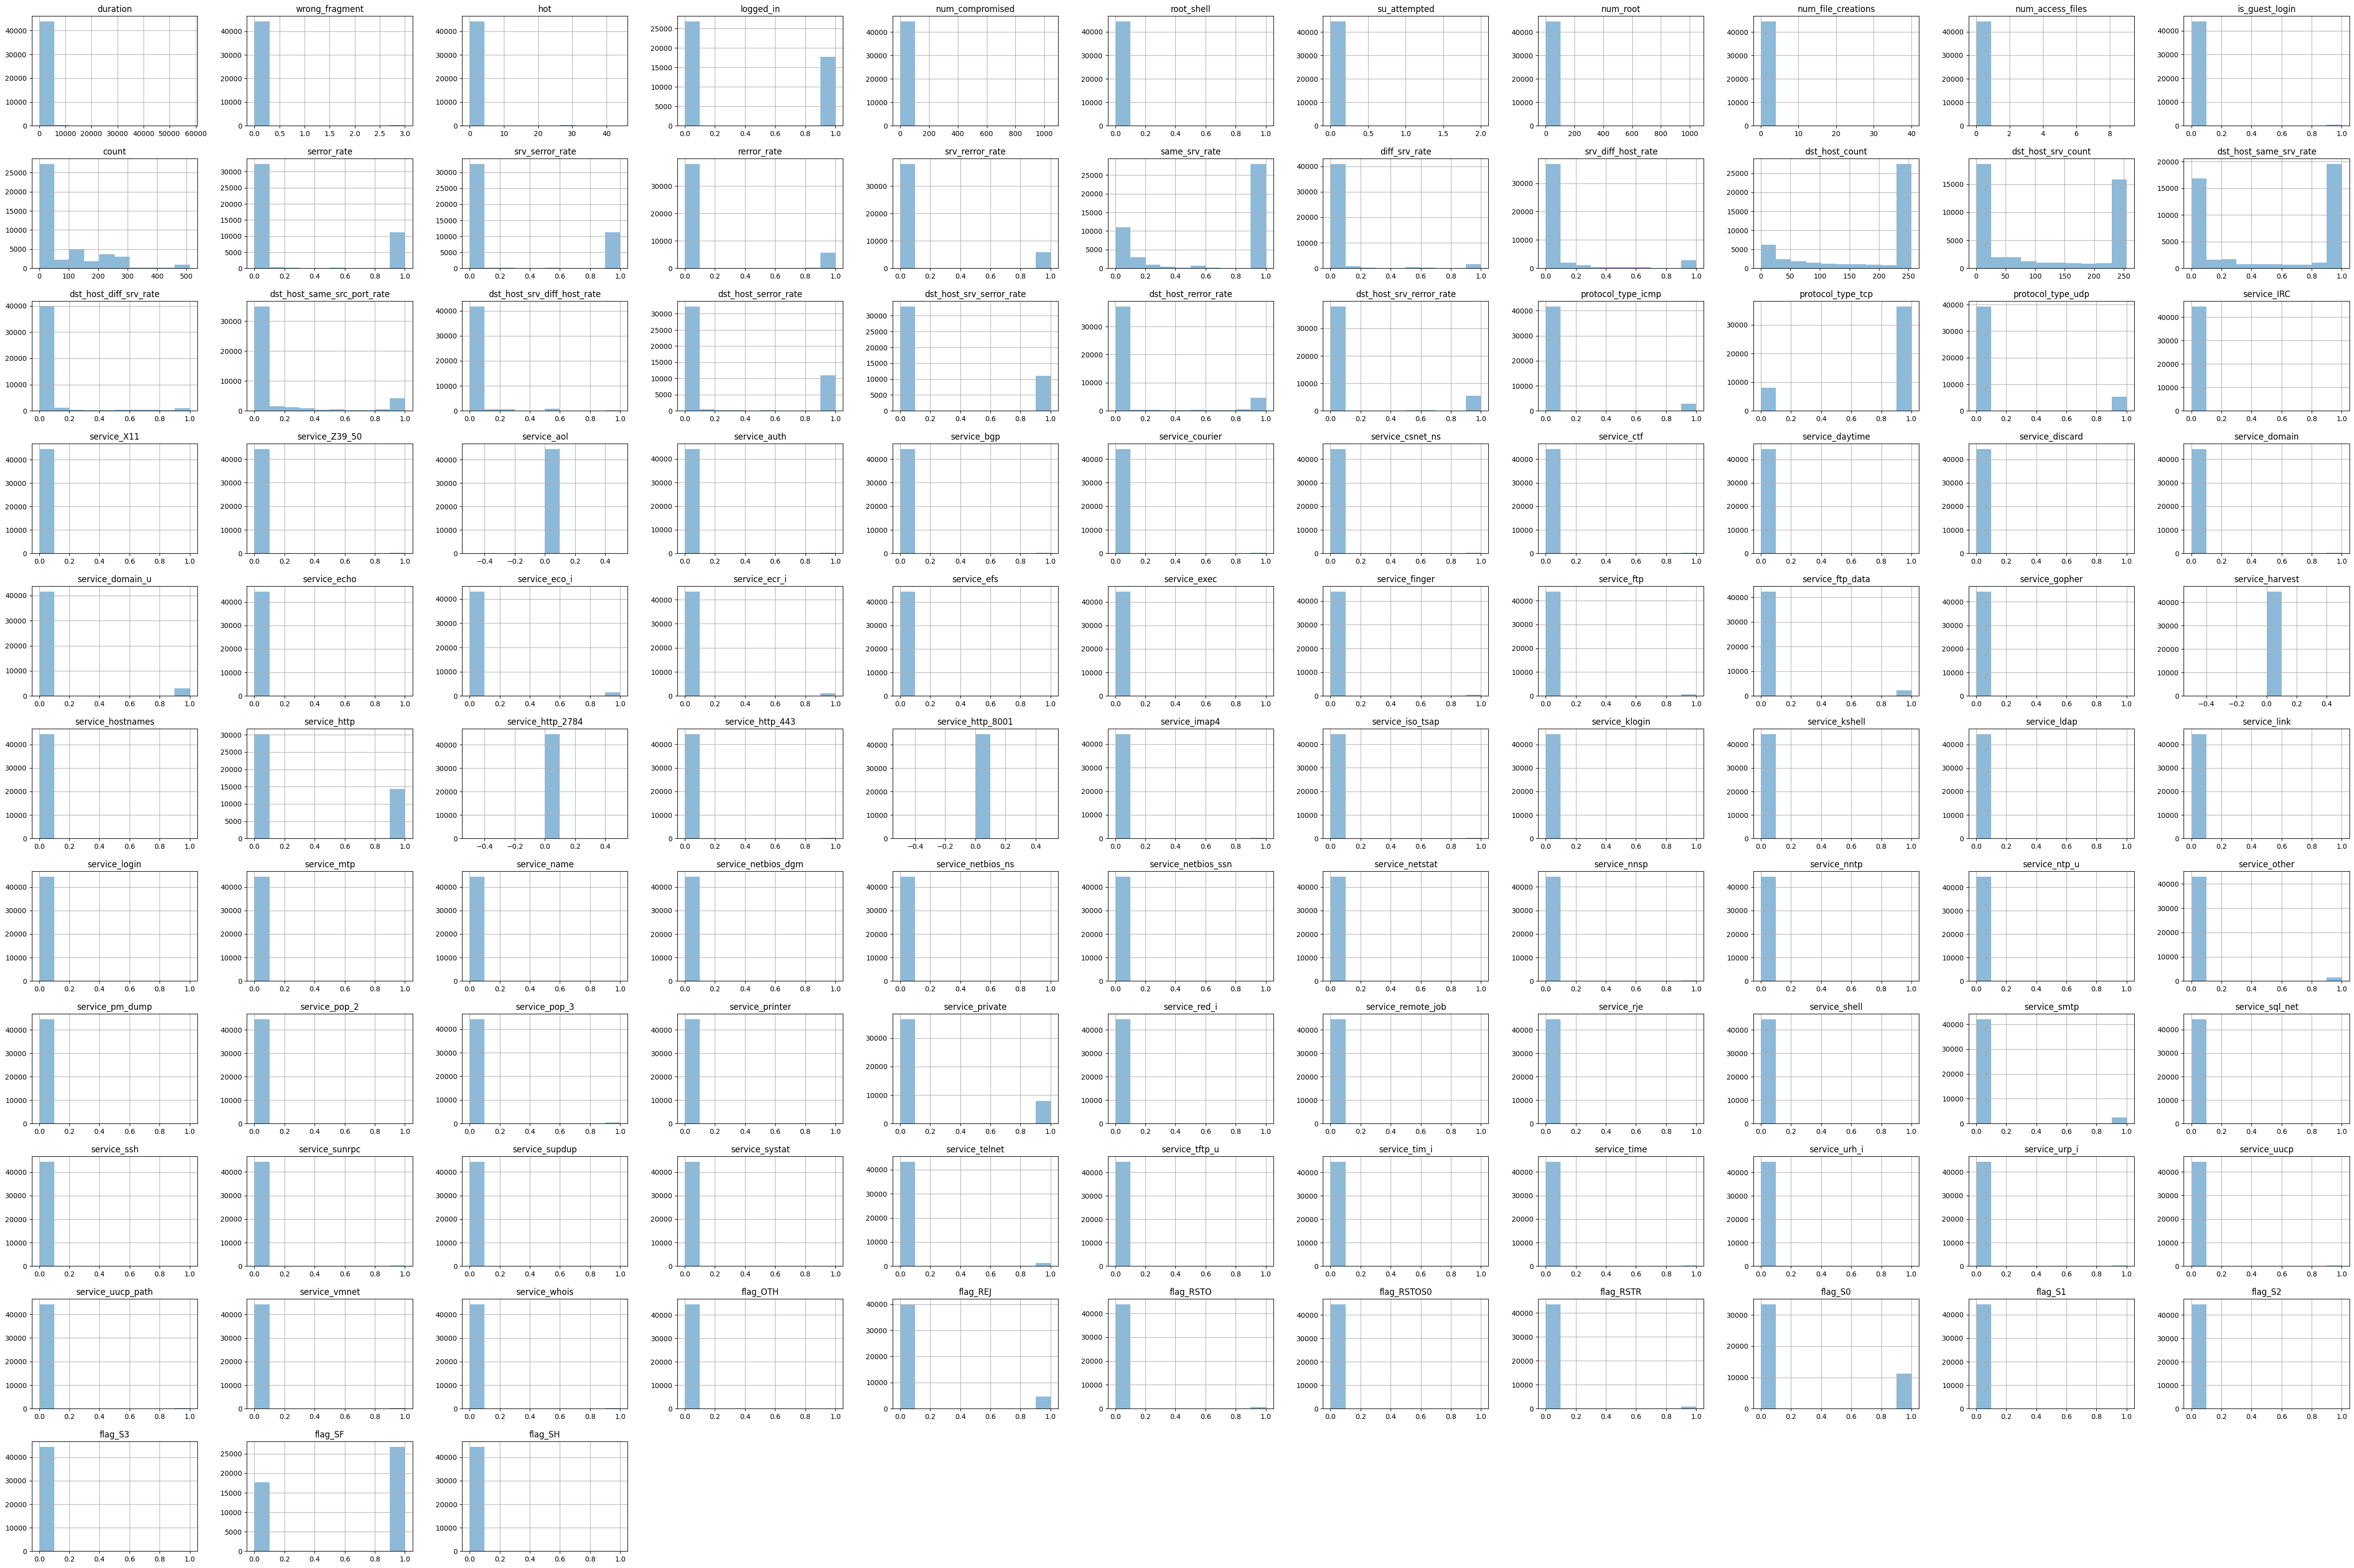

In [67]:
support_data.hist(alpha=0.5, figsize=(60,40))
plt.show()

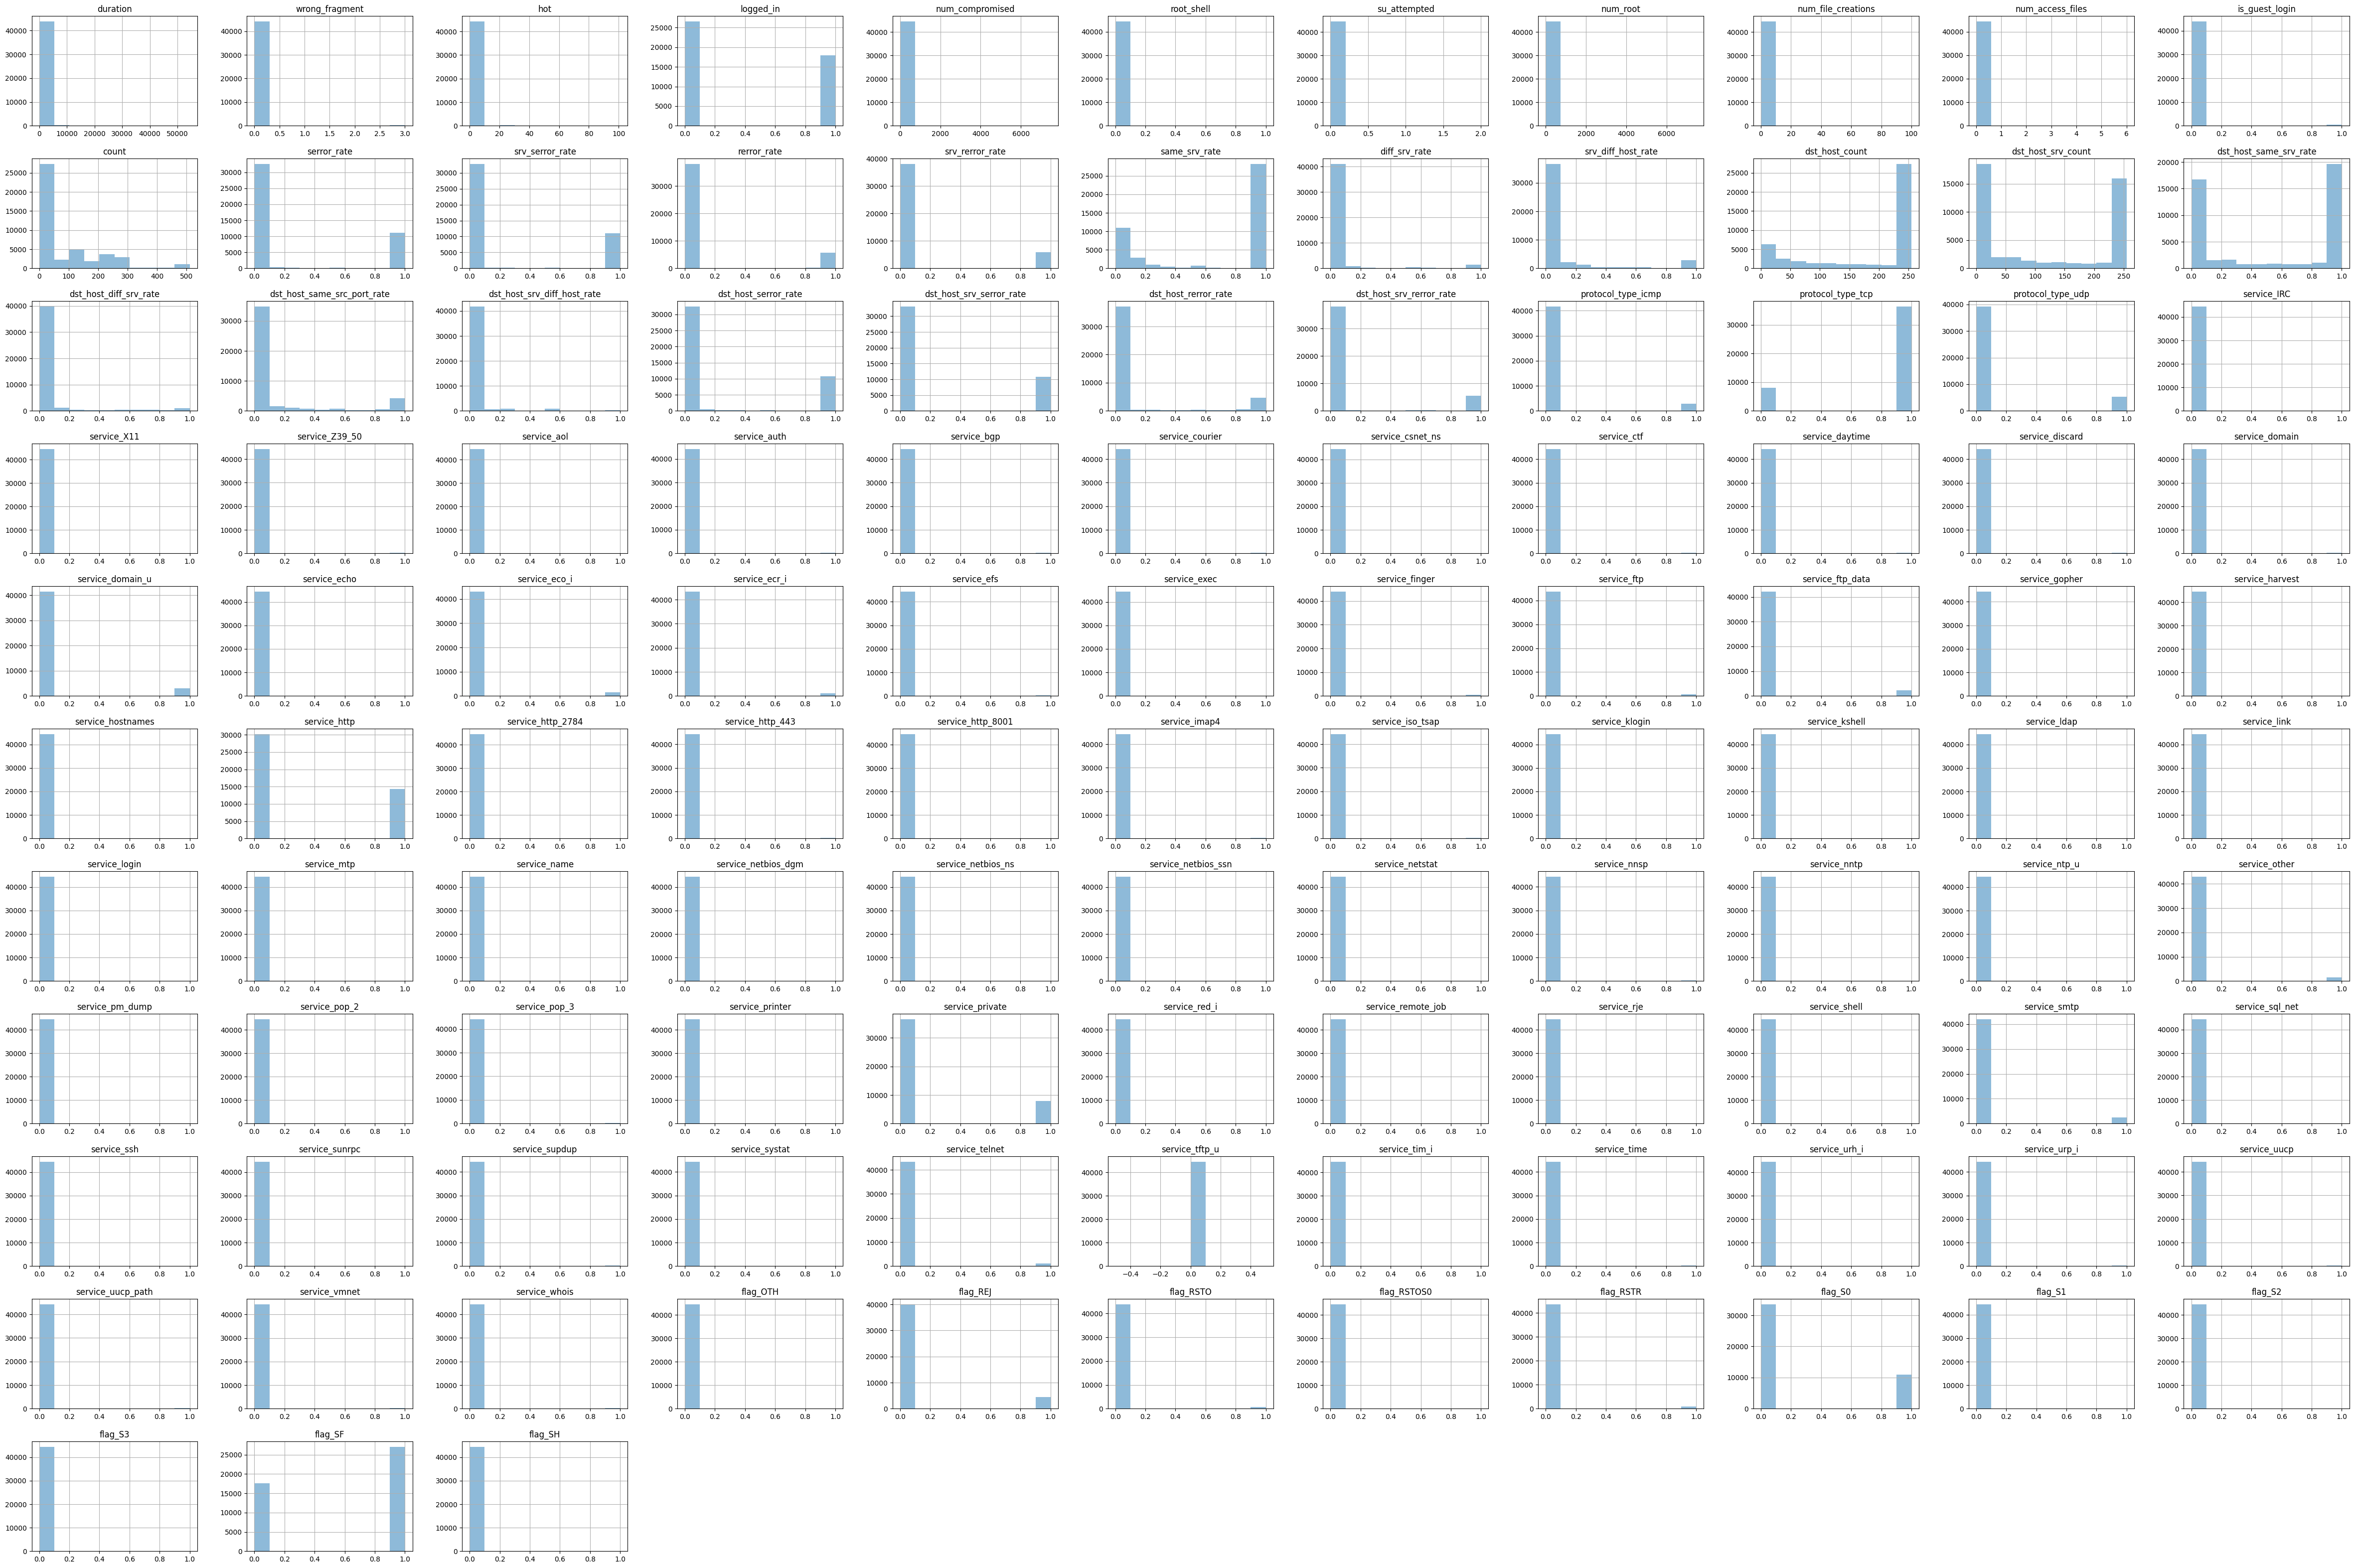

In [68]:
query_data.hist(alpha=0.5, figsize=(60,40))
plt.show()

In [ ]:
# print(train_df_encoded.info(verbose=True))